# Linear regression

In this notebook you will implement a simple linear regression algorithm using gradient descent

To get started, you will need a dataset, split into training, validation (10%), and testing sets (10%)

In [1]:
# we start by loading the boston houses dataset
from sklearn import datasets

X, y = datasets.load_boston(return_X_y=True)

# we will only keep the number of rooms feature
X = X[:,5]

# finally, we will convert X and y into numpy arrays
import numpy as np
X = np.array(X)
y = np.array(y)

print('The shape of X is: ', X.shape)
print('The shape of y is: ', y.shape)

The shape of X is:  (506,)
The shape of y is:  (506,)


In [2]:
# because we want to use cross validation, we must randomly select ~10% of the data as the test set
# 10% as the validation set, and the remaining 80% as the training set
Ntotal = X.shape[0]
Ntest_val = X.shape[0]//20
Ntrain = Ntotal - Ntest_val

# generate a list of Ntest_val random indices, without repetitions, in the range of Ntotal
# these indices will be the indices of your test data. Use the function np.random.choice()
test_val_idx = # your code here
test_idx = # your code here
val_idx = # your code here

X_ts = X[test_idx]
y_ts = y[test_idx]
X_vl = X[val_idx]
y_vl = y[val_idx]
X_tr = np.delete(X, test_val_idx)
y_tr = np.delete(y, test_val_idx)

print('The shape of X_ts is: ', X_ts.shape)
print('The shape of y_ts is: ', y_ts.shape)
print('The shape of X_vl is: ', X_vl.shape)
print('The shape of y_vl is: ', y_vl.shape)
print('The shape of X_tr is: ', X_tr.shape)
print('The shape of y_tr is: ', y_tr.shape)

# We will forget about the test data for now. We will only use it at the very end

The shape of X_ts is:  (12,)
The shape of y_ts is:  (12,)
The shape of X_vl is:  (13,)
The shape of y_vl is:  (13,)
The shape of X_tr is:  (481,)
The shape of y_tr is:  (481,)


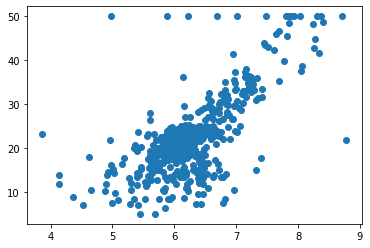

In [3]:
# let's first visualize the training data
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X_tr,y_tr)
plt.show()

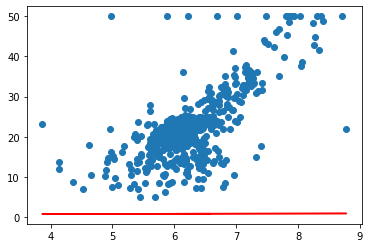

In [27]:
# We want to find the best values for bias and slope 
# for a line that will be the line of best fit for our data

# we do not have a values for bias and slope, so we can just initialize them to be
# random numbers drawn from a normal distribution with a zero mean and unit variance
# hint: use np.random.randn

bias = # your code here
slope = # your code here

# calculate y_hat using the bias and slope
y_hat = bias + slope*X_tr

# let's visualize the line that we get with this bias and slope, as well as our data
plt.scatter(X_tr, y_tr)
plt.plot(X_tr, y_hat, c='r')
plt.show()

In [28]:
# how do we improve that line? we must first calcualte the error

J = (1/2)*np.sum(np.power(y_hat - y_tr,2))

print('The initial MSE cost is: ', J)

The initial MSE cost is:  131967.27575539792


In [29]:
# how can we reduce the cost? We use gradient descent to 
# find the derivative of the objective function with 
# respect to the parameters bias and the slope
# Note: this is only done with the training set

dJdbias = # your code here
dJdslope = # your code here

In [30]:
# now we can update the bias and slope values
learning_rate = 0.0001

bias = # your code here
slope = # your code here

The MSE (training) cost is:  124086.98267601294
The MSE (validation) cost is:  3030.778943323975


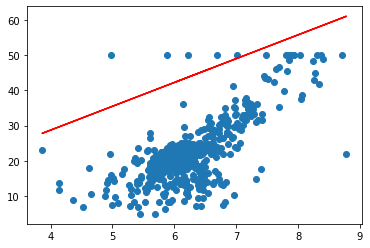

In [31]:
# calculate the line with the new slope and bias values
y_hat = bias + slope*X_tr

# for the training set
J = (1/2)*np.sum(np.power(y_hat - y_tr,2))
# and for the validation set
y_hat_vl = # your code here
J_vl = # your code here

print('The MSE (training) cost is: ', J)
print('The MSE (validation) cost is: ', J_vl)

# let's visualize the line that we get with this bias and slope, as well as our data
plt.scatter(X_tr, y_tr)
plt.plot(X_tr, y_hat, c='r')
plt.show()

In [32]:
# Now we put everything in a loop to repeat the gradient descent process multiple times

for i in range(500):
    dJdbias = # your code here
    dJdslope = # your code here
    bias = # your code here
    slope = # your code here
    # calculate the line with the new slope and bias values
    y_hat = # your code here

    # for the training set
    J = # your code here
    # and for the validation set
    y_hat_vl = # your code here
    J_vl = # your code here

    print('At iteration No. ' + str(i) + ' ,the MSE (training) cost is: ', J)
    print('------------------------------ the MSE (validation) cost is: ', J_vl)
    
# challenge: How can you stop this loop to optimally find the values for bias and slope 
# that result in the lowest error for the validation set?

At iteration No. 0 ,the MSE (training) cost is:  116733.52452239931
------------------------------ the MSE (validation) cost is:  3590.3996158817313
At iteration No. 1 ,the MSE (training) cost is:  109871.66078575113
------------------------------ the MSE (validation) cost is:  2680.3262955739037
At iteration No. 2 ,the MSE (training) cost is:  103468.50825109854
------------------------------ the MSE (validation) cost is:  3214.7649695951377
At iteration No. 3 ,the MSE (training) cost is:  97493.3833141409
------------------------------ the MSE (validation) cost is:  2376.7853735524504
At iteration No. 4 ,the MSE (training) cost is:  91917.65484575738
------------------------------ the MSE (validation) cost is:  2886.1489870107657
At iteration No. 5 ,the MSE (training) cost is:  86714.6068986486
------------------------------ the MSE (validation) cost is:  2113.9832421883257
At iteration No. 6 ,the MSE (training) cost is:  81859.31059775219
------------------------------ the MSE (vali

At iteration No. 276 ,the MSE (training) cost is:  13170.544268696878
------------------------------ the MSE (validation) cost is:  503.53126411924336
At iteration No. 277 ,the MSE (training) cost is:  13167.308337655848
------------------------------ the MSE (validation) cost is:  503.4820859904092
At iteration No. 278 ,the MSE (training) cost is:  13164.076029052078
------------------------------ the MSE (validation) cost is:  503.53663670747466
At iteration No. 279 ,the MSE (training) cost is:  13160.847338681348
------------------------------ the MSE (validation) cost is:  503.49115907812114
At iteration No. 280 ,the MSE (training) cost is:  13157.622262354285
------------------------------ the MSE (validation) cost is:  503.54249049154004
At iteration No. 281 ,the MSE (training) cost is:  13154.400795895668
------------------------------ the MSE (validation) cost is:  503.50047775642525
At iteration No. 282 ,the MSE (training) cost is:  13151.182935143781
-------------------------

At iteration No. 458 ,the MSE (training) cost is:  12637.427973347974
------------------------------ the MSE (validation) cost is:  505.4953726121266
At iteration No. 459 ,the MSE (training) cost is:  12634.788495493714
------------------------------ the MSE (validation) cost is:  505.51293651051594
At iteration No. 460 ,the MSE (training) cost is:  12632.15197053274
------------------------------ the MSE (validation) cost is:  505.53075845286264
At iteration No. 461 ,the MSE (training) cost is:  12629.518395161514
------------------------------ the MSE (validation) cost is:  505.54845989893624
At iteration No. 462 ,the MSE (training) cost is:  12626.887766080214
------------------------------ the MSE (validation) cost is:  505.5664062933761
At iteration No. 463 ,the MSE (training) cost is:  12624.2600799927
------------------------------ the MSE (validation) cost is:  505.584244366836
At iteration No. 464 ,the MSE (training) cost is:  12621.635333606524
------------------------------ 

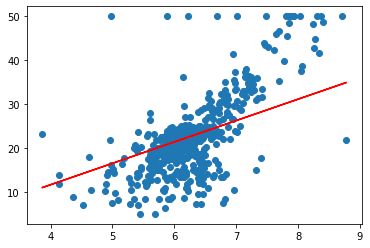

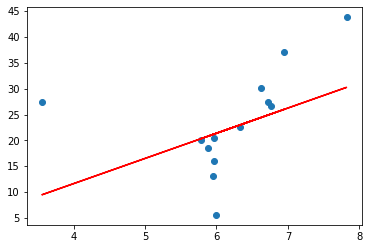

In [35]:
# let's visualize the line that we get with this bias and slope and the data

# this plot is for the training data and the line 
plt.scatter(X_tr, y_tr)
plt.plot(X_tr, y_hat, c='r')
plt.show()

# this plot is for the validation data and the line 
y_hat_vl = bias + slope*X_vl
plt.scatter(X_vl, y_vl)
plt.plot(X_vl, y_hat_vl, c='r')
plt.show()

Now answer the following questions:
* How were the training and validation errors different as you iterated over the gradient descent algorithm?
* In the final plots you generated, did the line look better aligned with the training or with the validation data?
* Are the final values or bias and slope positive, or negative? Why?

challenge: how can you 'normalize' the training and validation error to make a fair comparison between the two?

In [ ]:
# now evaluate the best values you found with the test data

# your code here